In [104]:
import numpy as np
from sklearn.linear_model import *
from lineartree import LinearTreeRegressor
import matplotlib.pyplot as plt
import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pp = pprint.PrettyPrinter(indent=4)
import time
import lightgbm as lgb

In [105]:
# Read the data from the csv file
data = np.genfromtxt('data/PHTSV_Table_HMAX_Adjusted.csv', delimiter=',')
data = data[1:-1, :]

# 2 D array containing Pressure and Enthalpy data
P_H = data[:, 0:2]

# Scale the pressure to bar and scale the enthalpy to kJ/mol
P_H[:, 0] = P_H[:, 0] / 1e5
P_H[:, 1] = P_H[:, 1] / 1000
minP = np.min(data[:, 0])
maxP = np.max(data[:, 0])
minH = np.min(data[:, 1])
maxH = np.max(data[:, 1])
print(minH)
print(maxH)
print(minP)
print(maxP)

# Vector containing Temperatures
T = data[:, 2]
minT = np.min(T)
maxT = np.max(T)

1.27588638
65.523
1.0
250.0


In [106]:
X_train, X_test, y_train, y_test = train_test_split(P_H, T, test_size=0.2, random_state=42)

# num_iterations

In [107]:
LT_dic = {}
time_start=time.time()
regr = LinearTreeRegressor(LinearRegression(), criterion='mse', max_bins=60,
                           min_samples_leaf=8, max_depth=8, min_impurity_decrease=0.1)
regr.fit(X_train, y_train)
time_end = time.time()
LT_dic['time'] = time_end - time_start
print('time cost:', LT_dic['time'], 's')
y_pred = regr.predict(X_test)
LT_dic['mse'] = round(mean_squared_error(y_pred, y_test),3)
print(f"Linear trees error: {LT_dic['mse']}")
LT_dic['num_leaves'] = len(regr.summary(only_leaves=True))
print('numer of leaves:', LT_dic['num_leaves'])

time cost: 5.696723937988281 s
Linear trees error: 0.422
numer of leaves: 148


In [108]:
train_data_linear = lgb.Dataset(
    X_train, label=y_train, params={'linear_tree': True, })
lgb_dic = {}
num_iterations = np.arange(20, 110, 10)
for i in range(len(num_iterations)):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.2,
        'num_leaves': 100,
        "verbosity": -1,
        'min_samples_leaf': 8,
        'max_bin': 60,
        'num_iterations': num_iterations[i],
        'max_depth': 8,
    }
    time_start = time.time()
    model_linear = lgb.train(params, train_data_linear)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = model_linear.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    df = model_linear.trees_to_dataframe()
    # len(df[df["right_child"].isnull()]) == len(
    #     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
    print('numer of leaves:', 2 * len(df[df["right_child"].isnull()]))
    lgb_dic['model' +
            str(i)] = {'time': time_end - time_start, 
                        'mse': round(mean_squared_error(y_test, y_pred_linear), 3), 
                        'num_leaves': 2 * len(df[df["right_child"].isnull()])}

time cost: 0.09075760841369629 s
Linear trees error: 3.927


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 4000
time cost: 0.1037149429321289 s
Linear trees error: 0.801


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 6000
time cost: 0.1136939525604248 s
Linear trees error: 0.602


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 8000
time cost: 0.13862848281860352 s
Linear trees error: 0.458


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 9984
time cost: 0.1901998519897461 s


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Linear trees error: 0.392
numer of leaves: 11824


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.22739148139953613 s
Linear trees error: 0.357
numer of leaves: 13582


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.28823018074035645 s
Linear trees error: 0.335
numer of leaves: 15178


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.2782564163208008 s
Linear trees error: 0.323
numer of leaves: 16924


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3321113586425781 s
Linear trees error: 0.313
numer of leaves: 18490


last


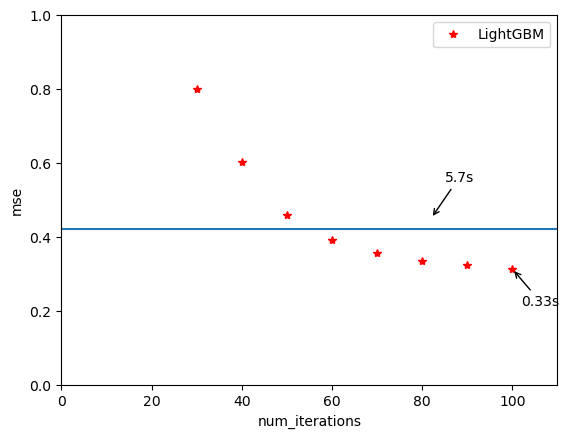

In [132]:
for i in range(len(num_iterations)):
    plt.plot(num_iterations[i], lgb_dic['model'+str(i)]['mse'], 'r*')
    if i == len(num_iterations)-1:
        print('last')
        plt.annotate(str(round(lgb_dic['model' + str(i)]['time'], 2)) + 's', 
                    xy=(num_iterations[i], lgb_dic['model' + str(i)]['mse']), 
                    xytext=(num_iterations[i]+2, lgb_dic['model' + str(i)]['mse']-0.1), 
                    arrowprops=dict(arrowstyle="->"))
plt.axhline(y=LT_dic['mse'])
plt.annotate(str(round(LT_dic['time'], 2)) + 's',
             xy=(82, 0.45),
             xytext=(85, 0.55),
             arrowprops=dict(arrowstyle="- >"))
plt.ylim(0, 1)
plt.xlim(0, 110)
plt.ylabel("mse")
plt.xlabel("num_iterations")
plt.legend(labels=['LightGBM'])

[Tree leaves](https://www.programiz.com/dsa/full-binary-tree) vs MSE
With other information(max_depth or max_bins vs # of iterations)